In [ ]:
%reload_ext autoreload
%autoreload 2

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Make sure we all see the same
np.random.seed(456);
torch.manual_seed(456);

In [4]:
import style
from style.utils import gallery, animate_progress

bb = style.Backbone()
st = style.IteratedStyleTransfer(bb)

100%|███████████████████████| 200/200 [00:17<00:00, 11.61it/s, loss=[9.475e-05 0.000e+00 9.205e-05 2.704e-06], lr=0.01]


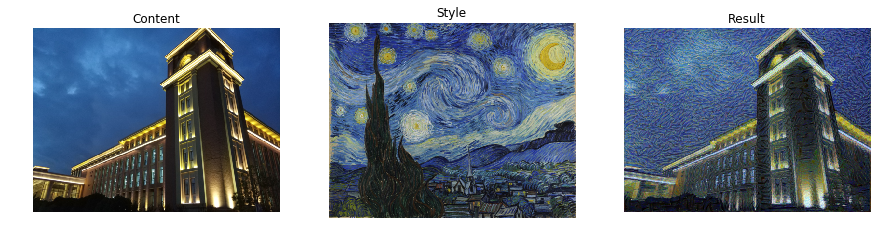

In [5]:
a = style.image.open('etc/vangogh.jpg').scale_long_to(512)
p = style.image.open('etc/ynu.jpg').scale_long_to(512)

# Get generator
g = st.generate(
    content=style.Content(p, lambda_loss=0),
    style=style.GramStyle(a, [4,8,12,14]),
    seed=p)

# Get next (final) result
x = next(g)

gallery([('Content',p), ('Style',a), ('Result', x)], figsize=(15,8))
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:25<00:00,  7.61s/it]


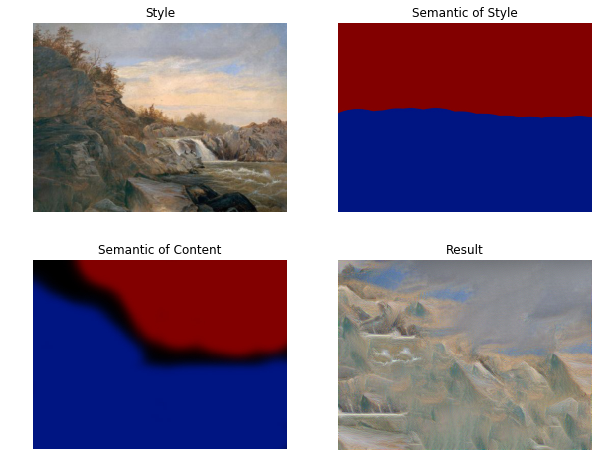

In [6]:
a_sem = \
    style.image.open('etc/match.jpg') \
    .scale_long_to(256, resample=style.image.NEAREST)
    
a = \
    style.image.open('etc/hudson.jpg') \
    .scale_long_to(256)

seed_sem = \
    style.image.open('etc/map.jpg') \
    .scale_to(a_sem.shape, resample=style.image.NEAREST)
    
seed = \
    style.image.new_random_range(seed_sem.shape, 0.1, 1)
    
    
sem_style = style.SemanticStyle(
    image=a, 
    semantic_style_image=a_sem, 
    semantic_content_image=seed_sem, 
    layer_ids=[5,9])

g = st.generate_multiscale(
    content=style.Content(lambda_loss=0),
    style=sem_style,
    seed=seed,
    niter=50)

# Below shows the reconstruction
x = next(g)

imgs = [('Style',a), ('Semantic of Style', a_sem), ('Semantic of Content', seed_sem), ('Result', x)]
gallery(imgs, rows=2, figsize=(10,8))
plt.show()